# Import Libaries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
from scipy import stats
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Data Information

In [30]:
# Melakukan load data
df = pd.read_csv('new_stockbit_idx_30_financials_table_ratio_dataset.csv')

# Menampilkan 10 data pertama
df.head(10)

,company_id,share_outstanding_q4_2007,share_outstanding_q1_2008,share_outstanding_q2_2008,share_outstanding_q3_2008,share_outstanding_q4_2008,share_outstanding_q1_2009,share_outstanding_q2_2009,share_outstanding_q3_2009,share_outstanding_q4_2009,...,interest_coverage_q2_2021,interest_coverage_q3_2021,interest_coverage_q4_2021,interest_coverage_q1_2022,interest_coverage_q2_2022,interest_coverage_q3_2022,interest_coverage_q4_2022,interest_coverage_q1_2023,interest_coverage_q2_2023,interest_coverage_q3_2023
0,BBCA,0.000000e+00,2.466000e+10,2.466000e+10,2.466000e+10,2.466000e+10,2.466000e+10,2.466000e+10,2.466000e+10,2.466000e+10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,BBRI,0.000000e+00,1.232000e+10,1.232000e+10,1.232000e+10,1.233000e+10,1.233000e+10,1.233000e+10,1.233000e+10,1.233000e+10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,TLKM,0.000000e+00,2.016000e+10,2.016000e+10,2.016000e+10,2.016000e+10,2.016000e+10,2.016000e+10,2.016000e+10,2.016000e+10,...,11.00,9.60,11.52,11.23,12.23,8.18,7.82,10.63,9.90,9.83
3,BMRI,2.075000e+10,2.075000e+10,2.091000e+10,2.091000e+10,2.091000e+10,2.091000e+10,2.096000e+10,2.096000e+10,2.097000e+10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ASII,0.000000e+00,4.050000e+09,4.050000e+09,4.050000e+09,4.050000e+09,4.050000e+09,4.050000e+09,4.050000e+09,4.050000e+09,...,11.29,12.84,13.32,17.96,22.40,19.16,20.61,20.20,18.54,10.91
5,ADRO,0.000000e+00,2.085000e+10,2.085000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,...,8.44,23.12,41.95,30.83,63.45,53.39,43.15,23.47,20.26,16.36
6,UNVR,0.000000e+00,7.630000e+09,7.630000e+09,7.630000e+09,0.000000e+00,7.630000e+09,7.630000e+09,0.000000e+00,7.630000e+09,...,38.67,30.82,54.64,79.94,159.88,105.66,40.18,44.53,83.72,110.40
7,INDF,0.000000e+00,9.440000e+09,9.440000e+09,9.440000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,...,7.69,241.95,5.49,4.97,1.56,2.60,2.15,6.37,4.49,6.12
8,ANTM,0.000000e+00,9.540000e+09,9.540000e+09,9.540000e+09,9.540000e+09,9.540000e+09,9.540000e+09,9.540000e+09,9.540000e+09,...,12.99,795.56,5.85,40.65,-1.41,66.16,4.76,27.56,13.71,6.11
9,PGAS,0.000000e+00,4.590000e+09,4.590000e+09,2.297000e+10,2.297000e+10,2.297000e+10,2.396000e+10,2.424000e+10,2.424000e+10,...,2.58,3.09,2.66,4.49,5.85,4.37,3.36,5.08,4.93,4.82


In [31]:
# Menampilkan 10 data terakhir
df.tail(10)

,company_id,share_outstanding_q4_2007,share_outstanding_q1_2008,share_outstanding_q2_2008,share_outstanding_q3_2008,share_outstanding_q4_2008,share_outstanding_q1_2009,share_outstanding_q2_2009,share_outstanding_q3_2009,share_outstanding_q4_2009,...,interest_coverage_q2_2021,interest_coverage_q3_2021,interest_coverage_q4_2021,interest_coverage_q1_2022,interest_coverage_q2_2022,interest_coverage_q3_2022,interest_coverage_q4_2022,interest_coverage_q1_2023,interest_coverage_q2_2023,interest_coverage_q3_2023
20,MEDC,0.000000e+00,3.330000e+09,3.330000e+09,3.330000e+09,3.330000e+09,3.330000e+09,3.330000e+09,3.330000e+09,3.330000e+09,...,1.38,1.78,2.61,3.09,4.76,3.51,4.41,2.66,2.65,3.41
21,BRPT,0.000000e+00,6.980000e+09,6.980000e+09,6.980000e+09,6.980000e+09,6.980000e+09,6.980000e+09,6.980000e+09,6.980000e+09,...,4.59,2.20,2.30,2.08,0.73,1.60,1.21,1.46,1.05,1.11
22,ARTO,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,MDKA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.81,9.42,11.10,8.77,7.97,2.42,0.28,0.79,0.03,2.93
24,BUKA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-602.64,-169.25,-37.44,6505.70,-3593.13,-2930.81,-1172.94,-569.05,477.55,-537.79
25,AKRA,3.120000e+09,3.120000e+09,3.130000e+09,3.130000e+09,3.130000e+09,3.130000e+09,3.130000e+09,3.130000e+09,3.140000e+09,...,18.79,18.93,48.86,36.21,39.96,44.03,123.92,46.80,32.85,40.39
26,TOWR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.020000e+09,1.020000e+09,9.800000e+08,...,5.21,5.03,2.58,2.64,2.71,3.06,3.02,2.35,2.32,2.60
27,EMTK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+08,6.300000e+08,6.300000e+08,3.140000e+09,3.140000e+09,...,20.02,21.75,5.94,17.12,10.31,9.88,-0.83,-7.47,-9.82,18.26
28,AMRT,0.000000e+00,3.090000e+09,3.090000e+09,3.090000e+09,3.090000e+09,3.430000e+09,3.430000e+09,3.430000e+09,3.430000e+09,...,9.92,10.68,7.33,19.22,17.55,14.83,30.12,20.73,23.71,21.54
29,ESSA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.35,6.06,1.14,6.61,10.02,10.55,10.88,1.72,1.41,3.60


## Data Summary

In [32]:
new_data = df.loc[:, ['company_id'] + df.filter(regex='2022|2023').columns.tolist()]

# Melakukan copy data
data_copy = new_data.copy()

# Menampilkan hasil
new_data

,company_id,share_outstanding_q1_2022,share_outstanding_q2_2022,share_outstanding_q3_2022,share_outstanding_q4_2022,share_outstanding_q1_2023,share_outstanding_q2_2023,share_outstanding_q3_2023,eps_q1_2022,eps_q2_2022,...,return_on_capital_employed_q1_2023,return_on_capital_employed_q2_2023,return_on_capital_employed_q3_2023,interest_coverage_q1_2022,interest_coverage_q2_2022,interest_coverage_q3_2022,interest_coverage_q4_2022,interest_coverage_q1_2023,interest_coverage_q2_2023,interest_coverage_q3_2023
0,BBCA,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,65.42,81.00,...,0.0108,0.0117,0.0110,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,BBRI,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,80.28,83.26,...,0.0106,0.0097,0.0104,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,TLKM,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,61.76,72.60,...,0.0547,0.0568,0.0597,11.23,12.23,8.18,7.82,10.63,9.90,9.83
3,BMRI,4.667000e+10,4.667000e+10,4.667000e+10,4.667000e+10,4.667000e+10,9.333000e+10,9.333000e+10,214.96,218.09,...,0.0088,0.0089,0.0095,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ASII,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,169.43,279.50,...,0.0359,0.0402,0.0334,17.96,22.40,19.16,20.61,20.20,18.54,10.91
5,ADRO,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,179.57,384.64,...,0.0714,0.0635,0.0542,30.83,63.45,53.39,43.15,23.47,20.26,16.36
6,UNVR,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,52.98,36.93,...,0.2815,0.2684,0.2775,79.94,159.88,105.66,40.18,44.53,83.72,110.40
7,INDF,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,268.53,61.83,...,0.0329,0.0257,0.0352,4.97,1.56,2.60,2.15,6.37,4.49,6.12
8,ANTM,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,60.98,2.52,...,0.0676,0.0148,0.0371,40.65,-1.41,66.16,4.76,27.56,13.71,6.11
9,PGAS,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,70.21,76.24,...,0.0219,0.0256,0.0232,4.49,5.85,4.37,3.36,5.08,4.93,4.82


In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          30 non-null     object 
 1   share_outstanding_q1_2022           30 non-null     float64
 2   share_outstanding_q2_2022           30 non-null     float64
 3   share_outstanding_q3_2022           30 non-null     float64
 4   share_outstanding_q4_2022           30 non-null     float64
 5   share_outstanding_q1_2023           30 non-null     float64
 6   share_outstanding_q2_2023           30 non-null     float64
 7   share_outstanding_q3_2023           30 non-null     float64
 8   eps_q1_2022                         30 non-null     float64
 9   eps_q2_2022                         30 non-null     float64
 10  eps_q3_2022                         30 non-null     float64
 11  eps_q4_2022                         30 non-null

## Data Describe

In [34]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
share_outstanding_q1_2022,30.0,7.792300e+10,2.124289e+11,1.130000e+09,1.431000e+10,2.469000e+10,4.997750e+10,1.184360e+12
share_outstanding_q2_2022,30.0,7.832400e+10,2.122951e+11,1.130000e+09,1.431000e+10,2.469000e+10,4.997750e+10,1.184360e+12
share_outstanding_q3_2022,30.0,7.832400e+10,2.122951e+11,1.130000e+09,1.431000e+10,2.469000e+10,4.997750e+10,1.184360e+12
share_outstanding_q4_2022,30.0,7.835167e+10,2.122856e+11,1.130000e+09,1.431000e+10,2.469000e+10,4.997750e+10,1.184360e+12
share_outstanding_q1_2023,30.0,7.840400e+10,2.122698e+11,1.130000e+09,1.449500e+10,2.469000e+10,4.997750e+10,1.184360e+12
share_outstanding_q2_2023,30.0,7.995967e+10,2.122002e+11,1.130000e+09,1.449500e+10,2.469000e+10,5.868250e+10,1.184360e+12
share_outstanding_q3_2023,30.0,7.995967e+10,2.122002e+11,1.130000e+09,1.449500e+10,2.469000e+10,5.868250e+10,1.184360e+12
eps_q1_2022,30.0,2.162447e+02,5.164750e+02,-5.460000e+00,2.873500e+01,6.835500e+01,1.770350e+02,2.709840e+03
eps_q2_2022,30.0,2.459460e+02,6.598764e+02,-5.780000e+01,1.659250e+01,6.721500e+01,1.228225e+02,3.359590e+03
eps_q3_2022,30.0,3.263850e+02,1.102014e+03,-4.822000e+01,2.115250e+01,4.663000e+01,1.384000e+02,5.979670e+03


In [35]:
new_data['roc_ratio_2022'] = new_data[['return_on_capital_employed_q1_2022','return_on_capital_employed_q2_2022','return_on_capital_employed_q3_2022',
                                                     'return_on_capital_employed_q4_2022',]].sum(axis=1)
new_data['roc_ratio_2023'] = new_data[['return_on_capital_employed_q1_2023','return_on_capital_employed_q2_2023','return_on_capital_employed_q3_2023']].sum(axis=1)

new_data['interest_coverage_2022'] = new_data[['interest_coverage_q1_2022','interest_coverage_q2_2022', 'interest_coverage_q3_2022','interest_coverage_q4_2022']].sum(axis=1)
new_data['interest_coverage_2023'] = new_data[['interest_coverage_q1_2023','interest_coverage_q2_2023', 'interest_coverage_q3_2023']].sum(axis=1)

# Exploratory Data Analysis (EDA)

## Share Outstanding

In [36]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['total_share_outstanding_2022'] = new_data[['share_outstanding_q1_2022', 'share_outstanding_q2_2022', 'share_outstanding_q3_2022', 'share_outstanding_q4_2022']].sum(axis=1)
new_data['total_share_outstanding_2023'] = new_data[['share_outstanding_q1_2023', 'share_outstanding_q2_2023', 'share_outstanding_q3_2023']].sum(axis=1)


# Melihat top 10 share outstanding
top10_share_outstanding_2022 = (new_data
            .groupby(['company_id'])
            .agg(mean_share_outstanding_2022=('total_share_outstanding_2022','mean'), mean_share_outstanding_2023=('total_share_outstanding_2023','mean'))
            .reset_index()
            .sort_values('mean_share_outstanding_2023',ascending=False)
            .head(10)
            )
top10_share_outstanding_2022

,company_id,mean_share_outstanding_2022,mean_share_outstanding_2023
15,GOTO,4.737440e+12,3.553080e+12
8,BBRI,6.062400e+11,4.546800e+11
6,BBCA,4.931200e+11,3.698400e+11
11,BUKA,4.122500e+11,3.092300e+11
26,TLKM,3.962400e+11,2.971800e+11
10,BRPT,3.750000e+11,2.812500e+11
9,BMRI,1.866800e+11,2.333300e+11
13,EMTK,2.449600e+11,1.837200e+11
27,TOWR,2.040400e+11,1.530300e+11
20,KLBF,1.875200e+11,1.406400e+11


<Axes: xlabel='company_id', ylabel='mean_share_outstanding_2023'>

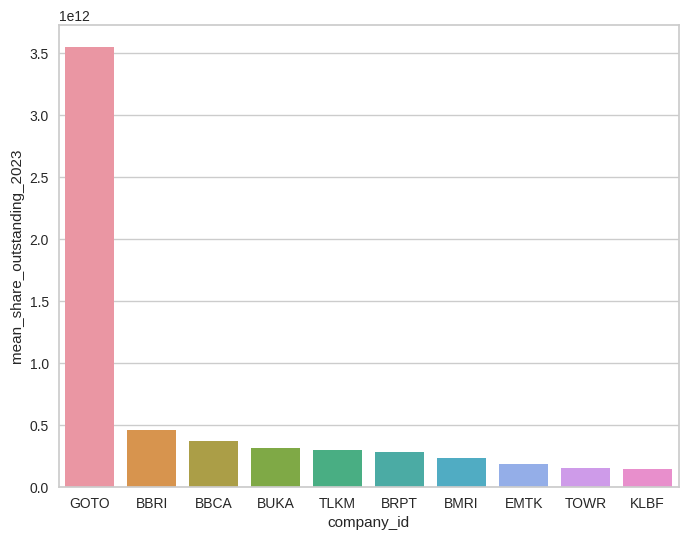

In [37]:
plt.figure(figsize=(8,6))
top10_share_outstanding_2022['company_id'] = top10_share_outstanding_2022['company_id'].astype(str)
sns.barplot(data=top10_share_outstanding_2022, x='company_id', y='mean_share_outstanding_2023')

## Earning Per Share

<Axes: xlabel='company_id', ylabel='mean_earning_pershare_2023'>

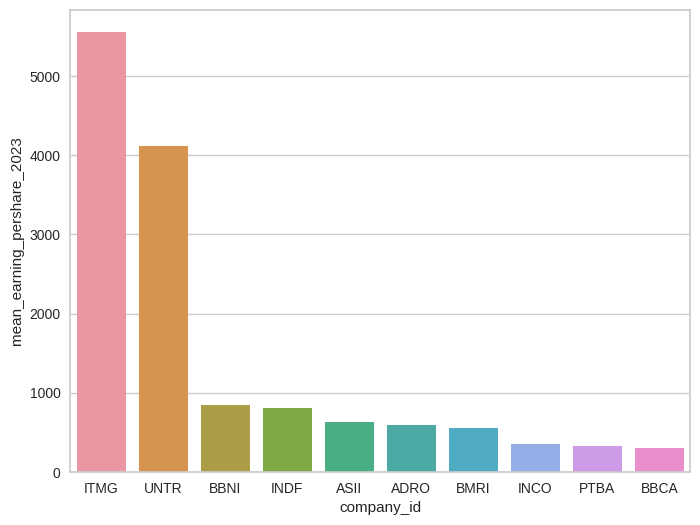

In [38]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['earning_pershare_2022'] = new_data[['eps_q1_2022', 'eps_q2_2022', 'eps_q3_2022', 'eps_q4_2022']].sum(axis=1)
new_data['earning_pershare_2023'] = new_data[['eps_q1_2023', 'eps_q2_2023','eps_q3_2023']].sum(axis=1)


# Melihat top 10 share outstanding
top10_earning_pershare_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_earning_pershare_2022=('earning_pershare_2022','mean'), mean_earning_pershare_2023=('earning_pershare_2023','mean'))
            .reset_index()
            .sort_values('mean_earning_pershare_2023',ascending=False)
            .head(10)
            )
top10_earning_pershare_2023

plt.figure(figsize=(8,6))
top10_earning_pershare_2023['company_id'] = top10_earning_pershare_2023['company_id'].astype(str)
sns.barplot(data=top10_earning_pershare_2023, x='company_id', y='mean_earning_pershare_2023')

## Price Earnings Ratio

<Axes: xlabel='company_id', ylabel='mean_pe_ratio_2023'>

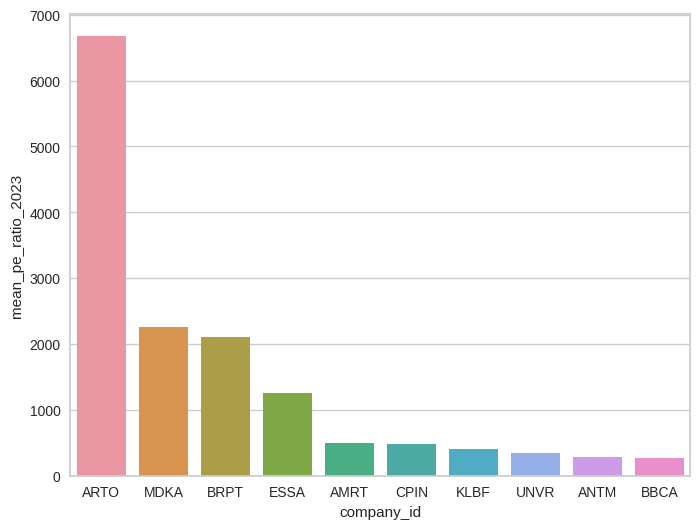

In [39]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['pe_ratio_2022'] = new_data[['pe_ratio_q1_2022', 'pe_ratio_q2_2022','pe_ratio_q3_2022', 'pe_ratio_q4_2022']].sum(axis=1)
new_data['pe_ratio_2023'] = new_data[['pe_ratio_q1_2023','pe_ratio_q2_2023', 'pe_ratio_q3_2023']].sum(axis=1)


# Melihat top 10 share outstanding
top10_peratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_pe_ratio_2022=('pe_ratio_2022','mean'), mean_pe_ratio_2023=('pe_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_pe_ratio_2023',ascending=False)
            .head(10)
            )
top10_peratio_2023

plt.figure(figsize=(8,6))
top10_peratio_2023['company_id'] = top10_peratio_2023['company_id'].astype(str)
sns.barplot(data=top10_peratio_2023, x='company_id', y='mean_pe_ratio_2023')

## Price to Sale Ratio

<Axes: xlabel='company_id', ylabel='mean_pts_ratio_2023'>

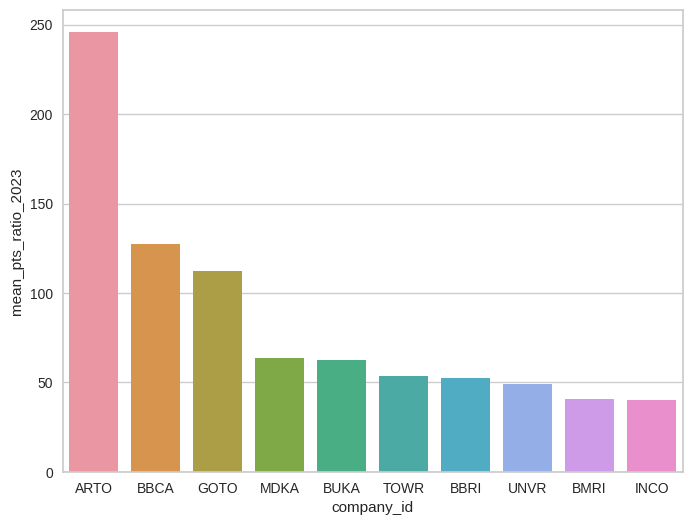

In [40]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['pts_ratio_2022'] = new_data[['price_to_sales_q1_2022','price_to_sales_q2_2022', 'price_to_sales_q3_2022','price_to_sales_q4_2022']].sum(axis=1)
new_data['pts_ratio_2023'] = new_data[['price_to_sales_q1_2023','price_to_sales_q2_2023', 'price_to_sales_q2_2023']].sum(axis=1)


# Melihat top 10 share outstanding
top10_ptsratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_pts_ratio_2022=('pts_ratio_2022','mean'), mean_pts_ratio_2023=('pts_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_pts_ratio_2023',ascending=False)
            .head(10)
            )
top10_ptsratio_2023

plt.figure(figsize=(8,6))
top10_ptsratio_2023['company_id'] = top10_ptsratio_2023['company_id'].astype(str)
sns.barplot(data=top10_ptsratio_2023, x='company_id', y='mean_pts_ratio_2023')

## EBITDA

<Axes: xlabel='company_id', ylabel='mean_ebitda_ratio_2023'>

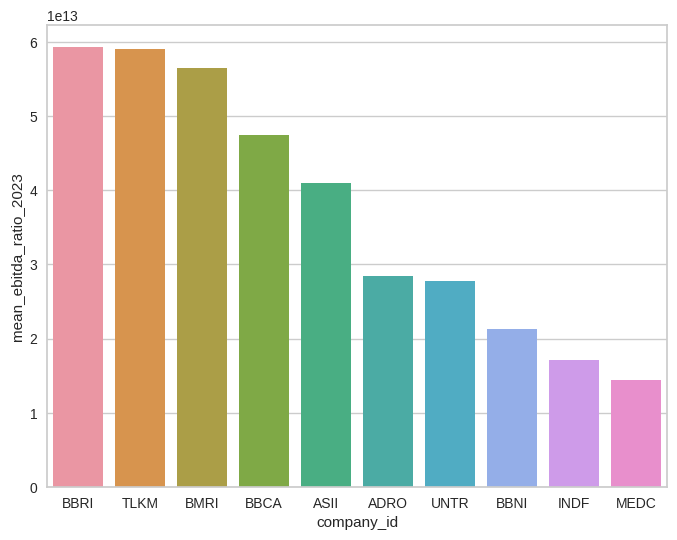

In [41]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['ebitda_ratio_2022'] = new_data[['ebitda_q1_2022','ebitda_q2_2022', 'ebitda_q3_2022', 'ebitda_q4_2022']].sum(axis=1)
new_data['ebitda_ratio_2023'] = new_data[['ebitda_q1_2023','ebitda_q2_2023', 'ebitda_q3_2023']].sum(axis=1)


# Melihat top 10 share outstanding
top10_ebitda_ratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_ebitda_ratio_2022=('ebitda_ratio_2022','mean'), mean_ebitda_ratio_2023=('ebitda_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_ebitda_ratio_2023',ascending=False)
            .head(10)
            )
top10_ebitda_ratio_2023

plt.figure(figsize=(8,6))
top10_ebitda_ratio_2023['company_id'] = top10_ebitda_ratio_2023['company_id'].astype(str)
sns.barplot(data=top10_ebitda_ratio_2023, x='company_id', y='mean_ebitda_ratio_2023')

## Return On Asset

In [42]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['roa_ratio_2022'] = new_data[['return_on_assets_q1_2022','return_on_assets_q2_2022', 'return_on_assets_q3_2022','return_on_assets_q4_2022']].sum(axis=1)
new_data['roa_ratio_2023'] = new_data[['return_on_assets_q1_2023','return_on_assets_q2_2023', 'return_on_assets_q3_2023']].sum(axis=1)

# Melihat top 10 share outstanding
top10_roaratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_roa_ratio_2022=('roa_ratio_2022','mean'), mean_roa_ratio_2023=('roa_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_roa_ratio_2023',ascending=False)
            .head(10)
            )

# change to str
top10_roaratio_2023['company_id'] = top10_roaratio_2023['company_id'].astype(str)

# Plotting pie chart for 2022
fig_2022 = px.pie(top10_roaratio_2023,
                  names='company_id',
                  values='mean_roa_ratio_2022',
                  title='Top 10 Companies by Mean ROA Ratio in 2022')

# Plotting pie chart for 2023
fig_2023 = px.pie(top10_roaratio_2023,
                  names='company_id',
                  values='mean_roa_ratio_2023',
                  title='Top 10 Companies by Mean ROA Ratio in 2023')

# Show the figure
fig_2022.show()
fig_2023.show()

## Return On Equity

In [43]:
# Menambahkan kolom baru 'total_share_outstanding' sebagai hasil sum per company_id
new_data['roe_ratio_2022'] = new_data[['return_on_equity_q1_2022', 'return_on_equity_q2_2022','return_on_equity_q3_2022', 'return_on_equity_q4_2022']].sum(axis=1)
new_data['roe_ratio_2023'] = new_data[['return_on_equity_q1_2023', 'return_on_equity_q2_2023','return_on_equity_q3_2023']].sum(axis=1)

# Melihat top 10 share outstanding
top10_roeratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_roe_ratio_2022=('roe_ratio_2022','mean'), mean_roe_ratio_2023=('roe_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_roe_ratio_2023',ascending=False)
            .head(10)
            )

# change to str
top10_roeratio_2023['company_id'] = top10_roeratio_2023['company_id'].astype(str)

# Plotting pie chart for 2022
fig_2022 = px.pie(top10_roeratio_2023,
                  names='company_id',
                  values='mean_roe_ratio_2022',
                  title='Top 10 Companies by Mean ROE Ratio in 2022')

# Plotting pie chart for 2023
fig_2023 = px.pie(top10_roeratio_2023,
                  names='company_id',
                  values='mean_roe_ratio_2023',
                  title='Top 10 Companies by Mean ROE Ratio in 2023')

# Show the figure
fig_2022.show()
fig_2023.show()

## Return On Capital

In [44]:
# Melihat top 10 share outstanding
top10_rocratio_2023 = (new_data
            .groupby(['company_id'])
            .agg(mean_roc_ratio_2022=('roc_ratio_2022','mean'), mean_roc_ratio_2023=('roc_ratio_2023','mean'))
            .reset_index()
            .sort_values('mean_roc_ratio_2023',ascending=False)
            .head(10)
            )


# change to str
top10_rocratio_2023['company_id'] = top10_rocratio_2023['company_id'].astype(str)

# Plotting pie chart for 2022
fig_2022 = px.pie(top10_rocratio_2023,
                  names='company_id',
                  values='mean_roc_ratio_2022',
                  title='Top 10 Companies by Mean ROC Ratio in 2022')

# Plotting pie chart for 2023
fig_2023 = px.pie(top10_rocratio_2023,
                  names='company_id',
                  values='mean_roc_ratio_2023',
                  title='Top 10 Companies by Mean ROC Ratio in 2023')

# Show the figure
fig_2022.show()
fig_2023.show()

# Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Melakukan Check Data Duplicate

In [45]:
# Melakukan Checking Data Duplicate
duplicate = data_copy.duplicated().sum()
print(f'Jumlah Data Duplicate {duplicate}')

Jumlah Data Duplicate 0


## Melakukan Cheking and Handling Missing Value

### Check Missing Value

In [46]:
data_copy.isna().sum()

company_id                            0
share_outstanding_q1_2022             0
share_outstanding_q2_2022             0
share_outstanding_q3_2022             0
share_outstanding_q4_2022             0
share_outstanding_q1_2023             0
share_outstanding_q2_2023             0
share_outstanding_q3_2023             0
eps_q1_2022                           0
eps_q2_2022                           0
eps_q3_2022                           0
eps_q4_2022                           0
eps_q1_2023                           0
eps_q2_2023                           0
eps_q3_2023                           0
pe_ratio_q1_2022                      0
pe_ratio_q2_2022                      0
pe_ratio_q3_2022                      0
pe_ratio_q4_2022                      0
pe_ratio_q1_2023                      0
pe_ratio_q2_2023                      0
pe_ratio_q3_2023                      0
price_to_sales_q1_2022                0
price_to_sales_q2_2022                0
price_to_sales_q3_2022                0


## Melakukan Checking dan Handling Outlier

### Melakukan Checking Outlier

In [47]:
# Melakukan Drop pada Column Tenure karena Merupakan column Categorical
data_outlier = data_copy.drop(columns = ['company_id'])

In [48]:
# Melihat skewness data
data_outlier.skew()

share_outstanding_q1_2022             5.204283
share_outstanding_q2_2022             5.208707
share_outstanding_q3_2022             5.208707
share_outstanding_q4_2022             5.209040
share_outstanding_q1_2023             5.209480
share_outstanding_q2_2023             5.191178
share_outstanding_q3_2023             5.191178
eps_q1_2022                           4.353237
eps_q2_2022                           4.184568
eps_q3_2022                           5.014090
eps_q4_2022                           4.821901
eps_q1_2023                           3.808651
eps_q2_2023                           3.450120
eps_q3_2023                           3.491613
pe_ratio_q1_2022                      5.449304
pe_ratio_q2_2022                     -3.381258
pe_ratio_q3_2022                      5.070766
pe_ratio_q4_2022                     -3.706510
pe_ratio_q1_2023                      3.466455
pe_ratio_q2_2023                      3.628840
pe_ratio_q3_2023                      4.420785
price_to_sale

In [49]:
normal = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in data_outlier:  # untuk mencari kolom mana yang skewed atau normal
    skewness = data_outlier[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

print(f'Kolom Numerik yang termasuk dalam skewed adalah {skewed}')
print(f'Kolom Numerik yang termasuk dalam normal adalah {normal}')

Kolom Numerik yang termasuk dalam skewed adalah ['share_outstanding_q1_2022', 'share_outstanding_q2_2022', 'share_outstanding_q3_2022', 'share_outstanding_q4_2022', 'share_outstanding_q1_2023', 'share_outstanding_q2_2023', 'share_outstanding_q3_2023', 'eps_q1_2022', 'eps_q2_2022', 'eps_q3_2022', 'eps_q4_2022', 'eps_q1_2023', 'eps_q2_2023', 'eps_q3_2023', 'pe_ratio_q1_2022', 'pe_ratio_q2_2022', 'pe_ratio_q3_2022', 'pe_ratio_q4_2022', 'pe_ratio_q1_2023', 'pe_ratio_q2_2023', 'pe_ratio_q3_2023', 'price_to_sales_q1_2022', 'price_to_sales_q2_2022', 'price_to_sales_q3_2022', 'price_to_sales_q4_2022', 'price_to_sales_q1_2023', 'price_to_sales_q2_2023', 'price_to_sales_q3_2023', 'ebitda_q1_2022', 'ebitda_q2_2022', 'ebitda_q3_2022', 'ebitda_q4_2022', 'ebitda_q1_2023', 'ebitda_q2_2023', 'ebitda_q3_2023', 'return_on_assets_q1_2022', 'return_on_assets_q2_2022', 'return_on_assets_q3_2022', 'return_on_assets_q4_2022', 'return_on_assets_q2_2023', 'return_on_assets_q3_2023', 'return_on_equity_q1_2022',

In [50]:
# mencari banyak outlier dengan IQR
Q1 = data_outlier.quantile(0.25)
Q3 = data_outlier.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = data_outlier[(data_outlier < LB) | (data_outlier > UB)].count()
print('Number of Outliers at each column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(No_Outliers, columns=['(No. Outliers)'])
# To show whole rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Number of Outliers at each column:

--------------------------------------------------
                                    (No. Outliers)
share_outstanding_q1_2022                        3
share_outstanding_q2_2022                        3
share_outstanding_q3_2022                        3
share_outstanding_q4_2022                        3
share_outstanding_q1_2023                        3
share_outstanding_q2_2023                        2
share_outstanding_q3_2023                        2
eps_q1_2022                                      2
eps_q2_2022                                      4
eps_q3_2022                                      4
eps_q4_2022                                      3
eps_q1_2023                                      3
eps_q2_2023                                      2
eps_q3_2023                                      3
pe_ratio_q1_2022                                 2
pe_ratio_q2_2022                                 3
pe_ratio_q3_2022                              

<ipython-input-51-d0e841a5dae1>:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



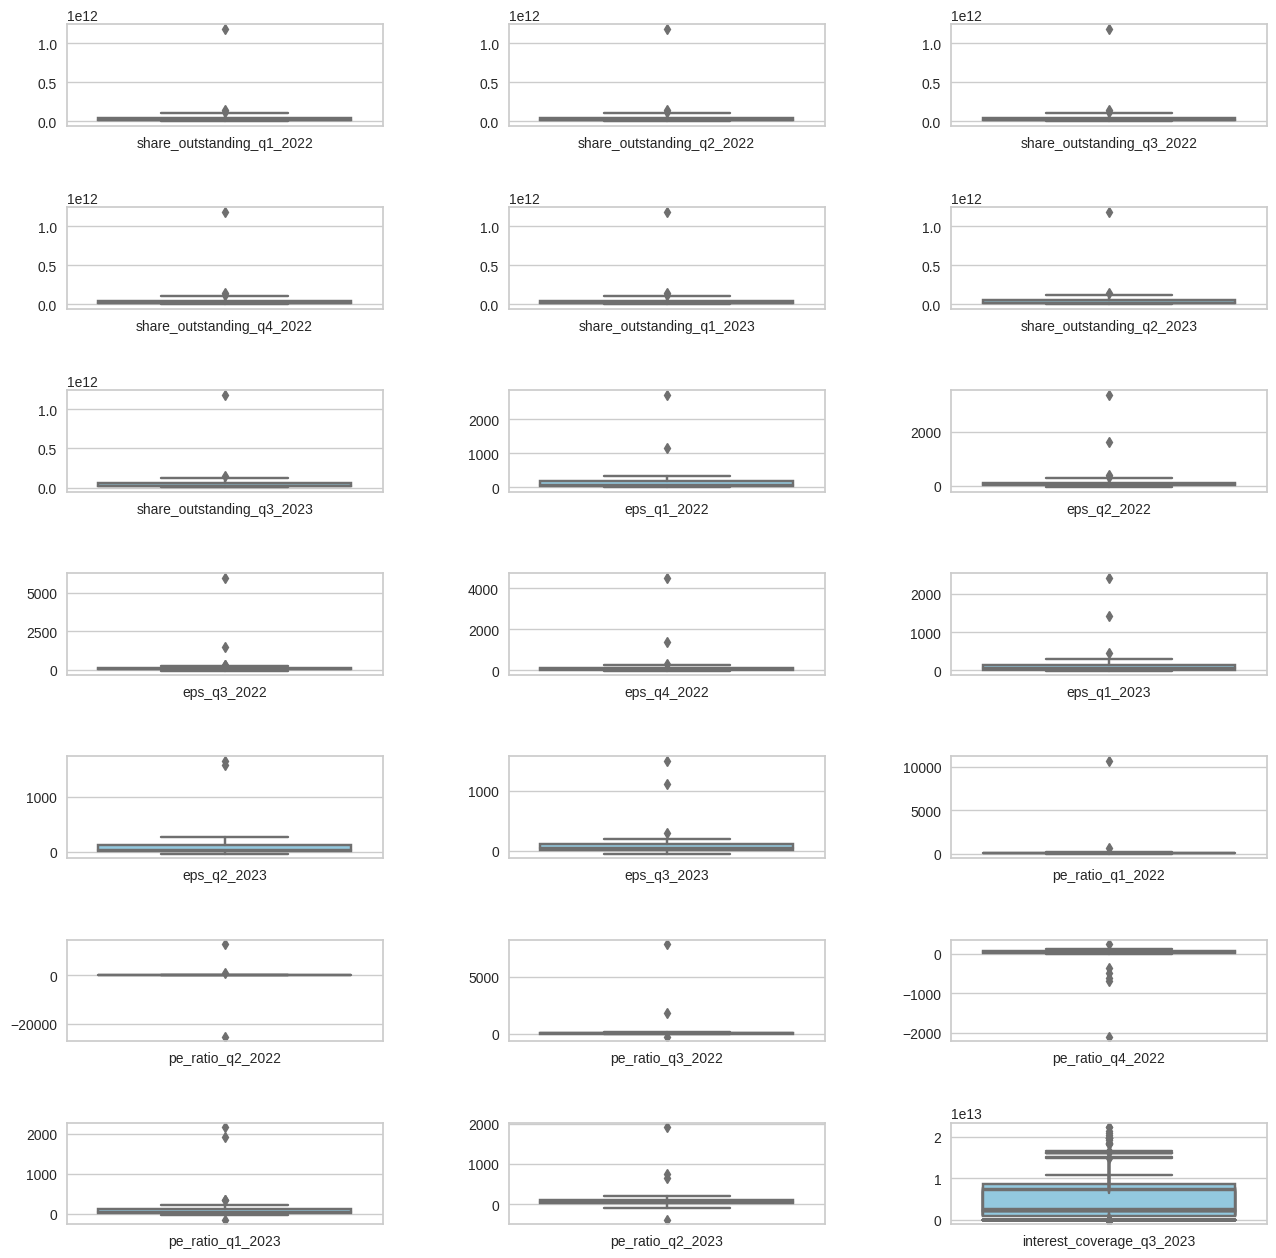

In [51]:
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

# Assuming data_outlier has 22 columns
for i, column in enumerate(data_outlier.columns, 1):
    # Use 21 instead of 22
    ax = plt.subplot(7, 3, i if i < 22 else 21)
    sns.boxplot(data_outlier[column], color='skyblue')

    # Mengatur nama pada sumbu x (x-axis label)
    ax.set_xticklabels([column], rotation=0)  # Menggunakan nama kolom sebagai label sumbu x

plt.show()

### Handling Outlier

#### Untuk Data yang terdistribusi normal akan dilakukan Capping dengan metode Gaussian.

> Dalam metode ini, outlier diidentifikasi dan kemudian dicapping pada nilai tertentu yang dianggap sebagai batas wajar. Langkah-langkah umum dalam metode capping outlier Gaussian melibatkan penggunaan mean dan standar deviasi dari data untuk menentukan batas atas dan batas bawah, dan kemudian mengganti nilai-nilai yang berada di luar batas tersebut dengan nilai batas tersebut

In [52]:
# Handling outlier dengan menggunakan metode caping gaussian untuk data yang berdistribusi normal
Capping_normal = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= normal)

Capping_normal = Capping_normal.fit_transform(data_outlier[normal])

#### Untuk Data yang terdistribusi skewed akan dilakukan Capping dengan metode IQR.

> Dalam metode ini, outlier diidentifikasi menggunakan IQR, yang merupakan perbedaan antara kuartil atas (Q3) dan kuartil bawah (Q1). Nilai-nilai yang berada di luar rentang (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) dianggap sebagai outlier dan kemudian dicapping pada nilai maksimum atau minimum dalam rentang tersebut

In [53]:
Capping_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables= skewed)

Capping_skewed = Capping_skewed.fit_transform(data_outlier[skewed])

#### Melihat Boxplot Setelah Dilakukan Handling Outlier

<ipython-input-54-9392f052df6c>:10: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



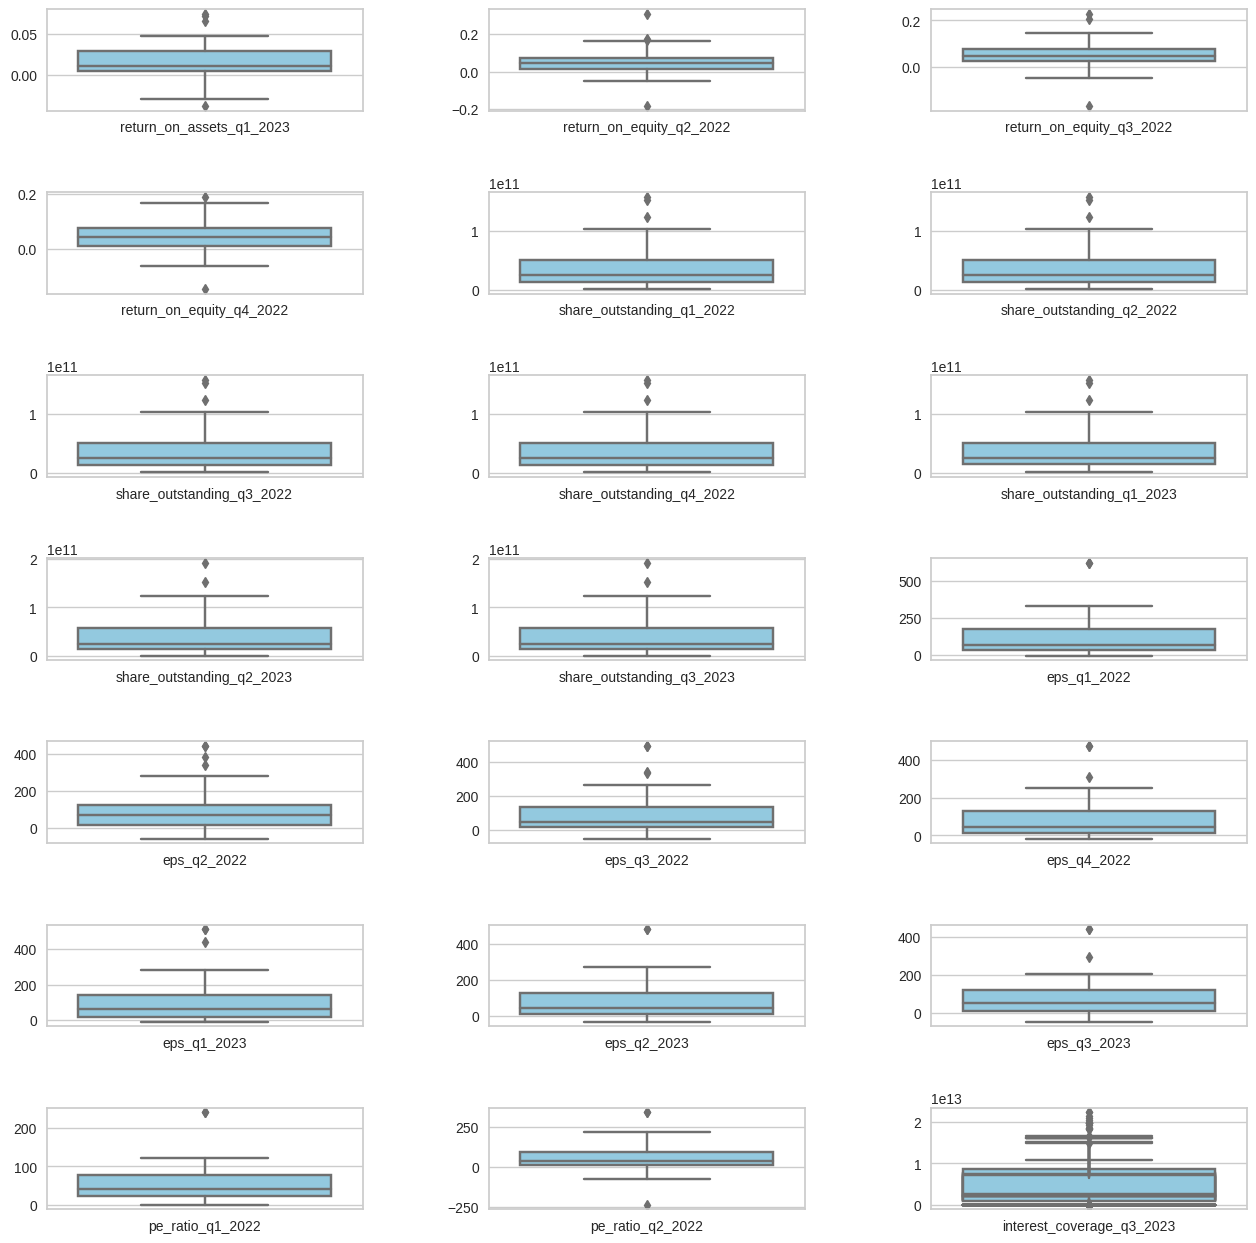

In [54]:
datacapped = pd.concat([Capping_normal, Capping_skewed], axis=1)

# Melihat Boxplot setelah dilakukan handling outlier
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

# Assuming datacapped has 22 columns
for i, column in enumerate(datacapped.columns, 1):
    # Use 21 instead of 22
    ax = plt.subplot(7, 3, i if i < 22 else 21)
    sns.boxplot(datacapped[column], color='skyblue')

    # Mengatur nama pada sumbu x (x-axis label)
    ax.set_xticklabels([column], rotation=0)  # Menggunakan nama kolom sebagai label sumbu x

plt.show()

## Feature Selection

In [55]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = vif["VIF"].round(1)
    return(vif)

# Define kolom yang dibutuhkan
data_VIF = datacapped


# Check Multicolinearity in X
calc_vif(data_VIF)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,return_on_assets_q1_2023,4.688808e+12
1,return_on_equity_q2_2022,2.868535e+13
2,return_on_equity_q3_2022,3.546141e+13
3,return_on_equity_q4_2022,2.309538e+13
4,share_outstanding_q1_2022,9.007199e+15
5,share_outstanding_q2_2022,inf
6,share_outstanding_q3_2022,inf
7,share_outstanding_q4_2022,inf
8,share_outstanding_q1_2023,inf
9,share_outstanding_q2_2023,inf


## Feature Scaling

In [56]:
datacapped.skew()

return_on_assets_q1_2023              0.371863
return_on_equity_q2_2022              0.251620
return_on_equity_q3_2022             -0.157728
return_on_equity_q4_2022             -0.376328
share_outstanding_q1_2022             1.419401
share_outstanding_q2_2022             1.441221
share_outstanding_q3_2022             1.441221
share_outstanding_q4_2022             1.443206
share_outstanding_q1_2023             1.441177
share_outstanding_q2_2023             1.551331
share_outstanding_q3_2023             1.551331
eps_q1_2022                           2.189958
eps_q2_2022                           1.324031
eps_q3_2022                           1.558416
eps_q4_2022                           1.682718
eps_q1_2023                           1.674792
eps_q2_2023                           1.983002
eps_q3_2023                           1.811276
pe_ratio_q1_2022                      2.074703
pe_ratio_q2_2022                      0.574407
pe_ratio_q3_2022                      0.599325
pe_ratio_q4_2

### Feature Scalling Menggunakan MinMaxScaler

In [57]:
scaler = MinMaxScaler()
MinMax_Scaler = scaler.fit_transform(datacapped)
MinMax_Scaler_df = pd.DataFrame(MinMax_Scaler, columns=datacapped.columns)
MinMax_Scaler_df

,return_on_assets_q1_2023,return_on_equity_q2_2022,return_on_equity_q3_2022,return_on_equity_q4_2022,share_outstanding_q1_2022,share_outstanding_q2_2022,share_outstanding_q3_2022,share_outstanding_q4_2022,share_outstanding_q1_2023,share_outstanding_q2_2023,...,return_on_capital_employed_q1_2023,return_on_capital_employed_q2_2023,return_on_capital_employed_q3_2023,interest_coverage_q1_2022,interest_coverage_q2_2022,interest_coverage_q3_2022,interest_coverage_q4_2022,interest_coverage_q1_2023,interest_coverage_q2_2023,interest_coverage_q3_2023
0,0.413854,0.474569,0.554537,0.597260,0.783766,0.783766,0.783766,0.783766,0.786568,0.642506,...,0.246195,0.138501,0.175813,0.419251,0.428060,0.422275,0.428571,0.428571,0.183086,0.417562
1,0.412078,0.465451,0.546953,0.557910,0.965223,0.965223,0.965223,0.965223,0.968673,0.791258,...,0.245312,0.128781,0.172692,0.419251,0.428060,0.422275,0.428571,0.428571,0.183086,0.417562
2,0.541741,0.496049,0.491333,0.534658,0.628361,0.628361,0.628361,0.628361,0.630606,0.515109,...,0.439885,0.357672,0.429129,0.466398,0.462344,0.450808,0.469549,0.485795,0.261961,0.490560
3,0.395204,0.476596,0.548722,0.574902,0.292204,0.292204,0.292204,0.292204,0.293248,0.484970,...,0.237370,0.124894,0.168010,0.419251,0.428060,0.422275,0.428571,0.428571,0.183086,0.417562
4,0.515098,0.499493,0.493103,0.525417,0.252486,0.252486,0.252486,0.252486,0.253389,0.206980,...,0.356938,0.277002,0.292328,0.494652,0.490854,0.489108,0.536569,0.537312,0.330797,0.498580
5,0.750444,0.704154,0.737829,0.751976,0.198011,0.198011,0.198011,0.198011,0.198719,0.162323,...,0.513567,0.390232,0.400520,0.548684,0.605930,0.608508,0.654680,0.554916,0.344501,0.539051
6,0.975133,1.000000,0.945644,1.000000,0.237536,0.237536,0.237536,0.237536,0.238385,0.194724,...,1.000000,1.000000,1.000000,0.754862,0.876254,0.790833,0.639117,0.668286,0.850098,1.000000
7,0.523091,0.396150,0.509536,0.533167,0.049086,0.049086,0.049086,0.049086,0.049261,0.040239,...,0.343702,0.206536,0.301691,0.440117,0.432433,0.431345,0.439838,0.462863,0.218858,0.463009
8,0.759325,0.380547,0.547711,0.588615,0.146936,0.146936,0.146936,0.146936,0.147461,0.120453,...,0.496801,0.153566,0.311573,0.589912,0.424107,0.653051,0.453514,0.576933,0.292316,0.462935
9,0.440497,0.473151,0.498917,0.464305,0.148284,0.148284,0.148284,0.148284,0.148814,0.121558,...,0.295169,0.206050,0.239272,0.438102,0.444459,0.437519,0.446178,0.455918,0.222364,0.453356


## PCA

> PCA adalah teknik reduksi dimensi yang umum digunakan dalam analisis data dan machine learning. Tujuan utama dari PCA adalah untuk mengurangi jumlah fitur (variabel) dalam dataset sambil mempertahankan sebanyak mungkin informasi asli.Tujuannya adalah untuk mengurangi dimensi dan peningkatan kinerja model.

In [58]:
# Melakukan reduksi dimensi dengan PCA
pca = PCA()
pca.fit(MinMax_Scaler_df)

# Melihat ukuran data sebelum di pca
MinMax_Scaler_df.shape

(30, 63)

Text(0, 0.5, 'Eigenvalues')

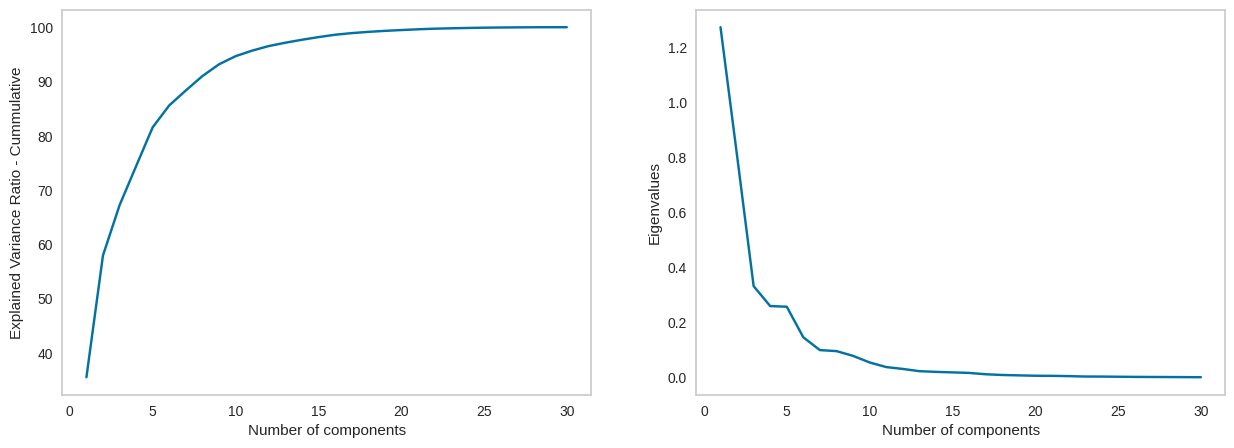

In [59]:
# Membuat plot Kumulatif dari Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 31), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Melihat hubungan jumlah komponen dengan eigenvalue
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 31), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

**INSIGHT:**   
-   Saya akan menetapkan angka 90% sebagai treshold, artinya hasil dari PCA nanti dapat menggambarkan data nya sebanyak 90% dibanding sebelum dilakukan dimensional reduksi. Saya menetapkan 90% karena tidak ingin kehilangan terlalu banyak informasi dari data.

In [60]:
# Melihat komponen yang dibutuhkan untuk memenuhi 90%
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.9) + 1
print(f'Jumlah Komponen yang diperlukan untuk menggambarkan 90% data adalah {num_features} Komponen')

Jumlah Komponen yang diperlukan untuk menggambarkan 90% data adalah 8 Komponen


In [61]:
# Melatih model dengan komponen yang sudah ditentukan sebelumnya (7)

pca_comp = PCA(n_components=8)

reduced_data = pca_comp.fit_transform(MinMax_Scaler_df)

# Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

`Alasan menggunakan adalah K-Means:`
- K-Means adalah algoritma pengelompokan yang sederhana dan efisien.
- Cocok untuk dataset dengan jumlah sampel yang besar dan berdimensi tinggi.
- Hasil kelompoknya dapat diinterpretasikan dengan mudah dan jelas

`Hyperparameter yang dipakai:`
- Jumlah Kelompok (n_clusters): Menentukan jumlah kelompok yang diinginkan.
- Inisialisasi Centroid (init)
- Jumlah Iterasi Maksimum (max_iter): Menentukan jumlah iterasi maksimum untuk konvergensi algoritma.

`Penggunaan Metrics:`
- Inertia (within-cluster sum of squares):
- Silhouette Score

### Elbow Method

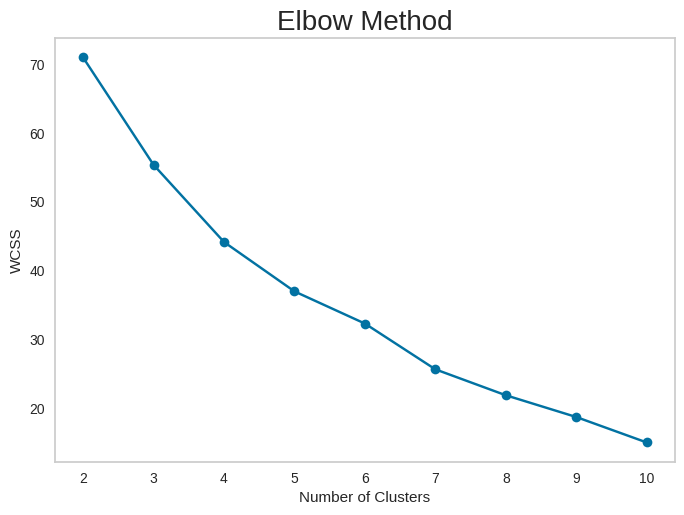

In [62]:
# Melihat nilai k terbaik berdasarkan metode elbow
import os
os.environ['OMP_NUM_THREADS'] = '1'

wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1): #melakukan for loop dengan range 2-11

# Model definition
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
# Model training
    km.fit(reduced_data)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


**INSIGHT :**
-   Menurut Elbow Method dan Penilaian pribadi saya , Elbow / Siku terletak pada `Jumlah Cluster = 5` , namun ini belum keputusan final dalam memilih Cluster, karena sekali lagi elbow method memiliki kekurangan yaitu penilaiannya tergantung orang yang melihat nya , sehingga perlu juga dilakukan perhitungan pasti menggunakan Silhouette Method.

### Silhouette Plot & Silhouette Score

> Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik suatu klasterisasi (clustering) telah dilakukan pada suatu dataset. Metrik ini memberikan gambaran tentang sejauh mana setiap titik data dalam suatu klaster mendekati titik-titik dalam klaster yang sama dibandingkan dengan klaster tetangga terdekatnya.

In [63]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Membuat subplot untuk 1 row dan 2 column
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # subplot pertama untuk silhoutte plot
        # Range sihouette antara -0.1 sampai 1 [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # (n_clusters+1)*10 adalah untuk menyisipkan ruang kosong di antara silhoutte score masing-masing cluster, untuk membatasinya dengan jelas.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize cluster dengan nilai n_clusters dan seed generator acak 10 untuk reproduktifitas
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # Silhouette_score memberikan nilai rata-rata untuk semua sampel.
        # Hal ini memberikan perspektif mengenai kepadatan dan pemisahan cluster yang terbentuk
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Menghitung skor silhoutte untuk setiap sampel
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate silhouette scores untuk sampel yang termasuk dalam cluster i, dan urutkan
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Menampilkan label pada plot siluet dengan nomor clusternya di tengah
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Hitung y_lower baru untuk plot berikutnya
            y_lower = y_upper + 10  # 10 untuk 0 sampel

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Garis vertikal untuk skor siluet rata-rata dari semua nilai
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # menghilangkan label y axis
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plot ke-2 menunjukkan cluster sebenarnya yang terbentuk
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling cluster
        centers = clusterer.cluster_centers_

        # Melihat lingkaran putih di pusat cluster
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.29461896671071663
For n_clusters = 3 The average silhouette_score is : 0.29126259226295415
For n_clusters = 4 The average silhouette_score is : 0.3238777812836874
For n_clusters = 5 The average silhouette_score is : 0.28103706518621924
For n_clusters = 6 The average silhouette_score is : 0.2748206569080676
For n_clusters = 7 The average silhouette_score is : 0.27800366652285047
For n_clusters = 8 The average silhouette_score is : 0.25927521231113115
For n_clusters = 9 The average silhouette_score is : 0.2616669916726974


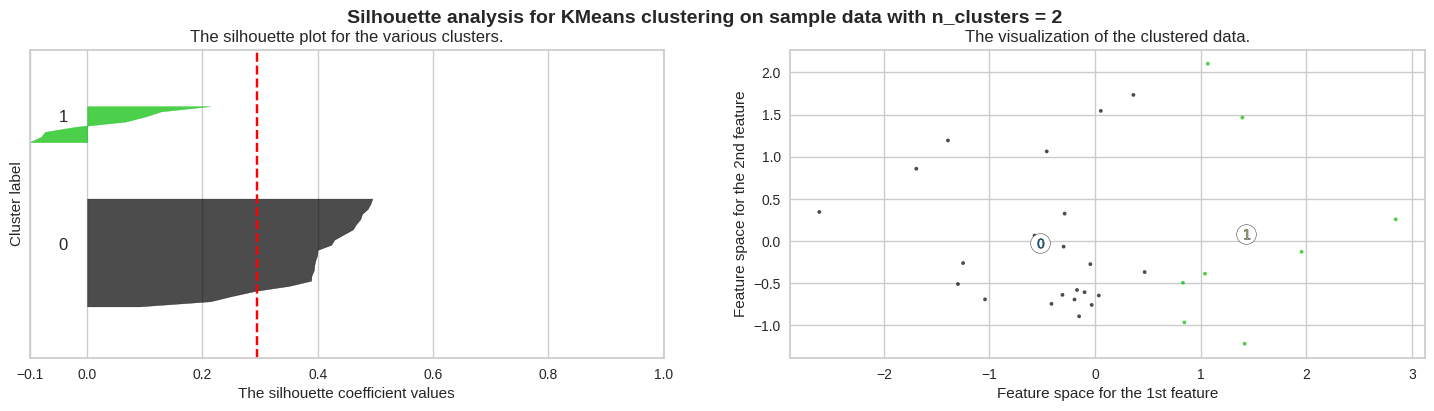

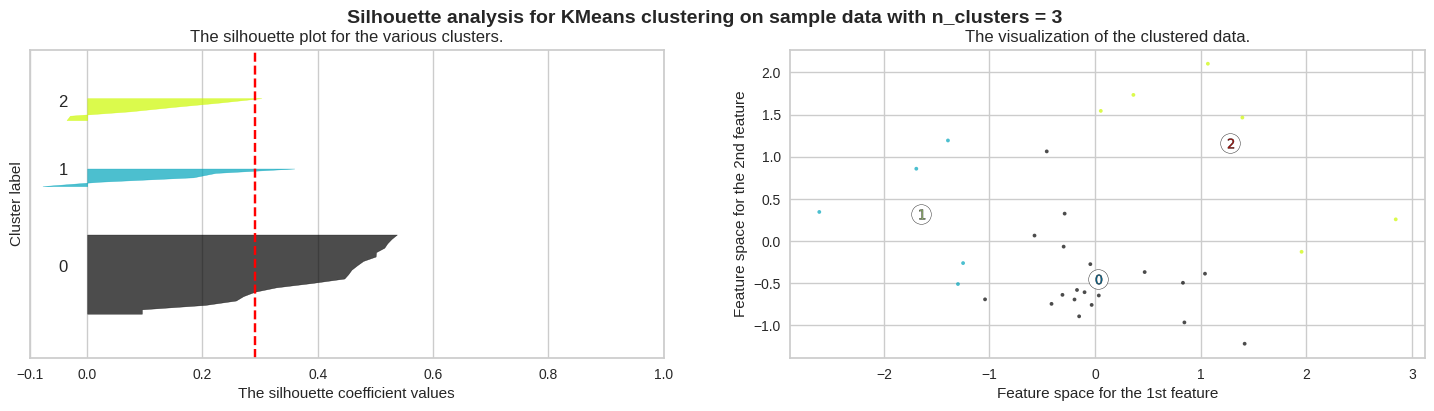

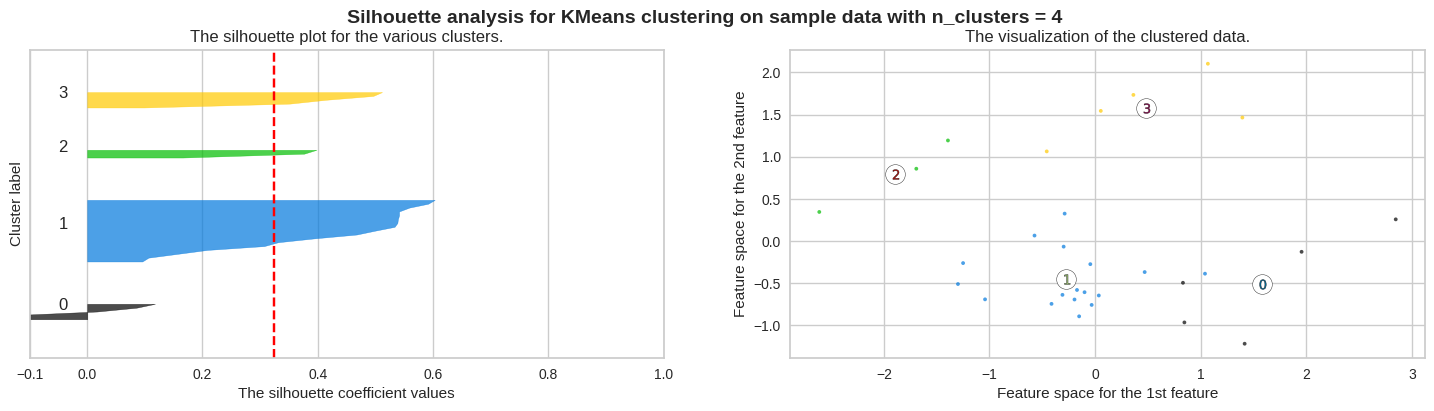

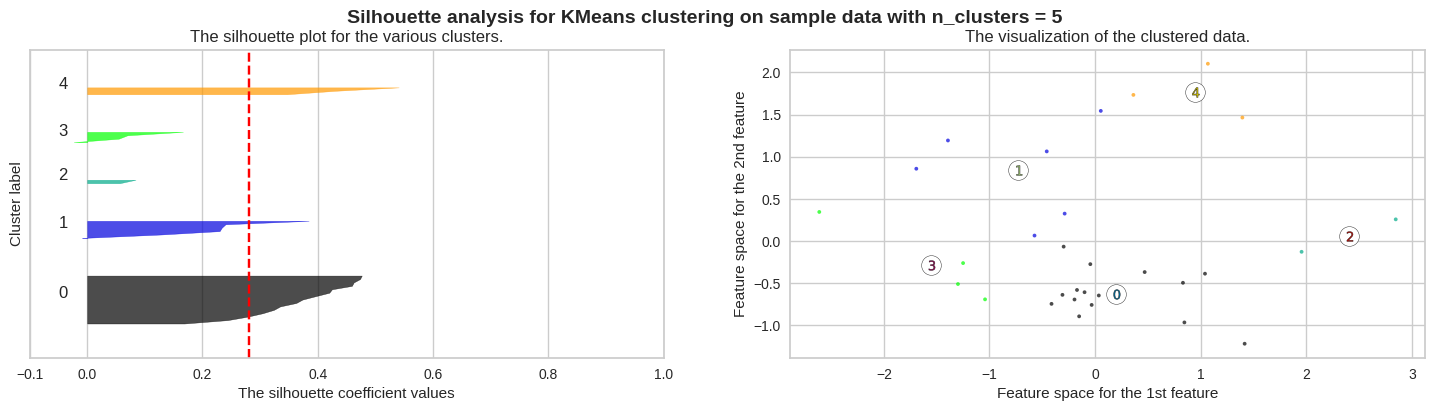

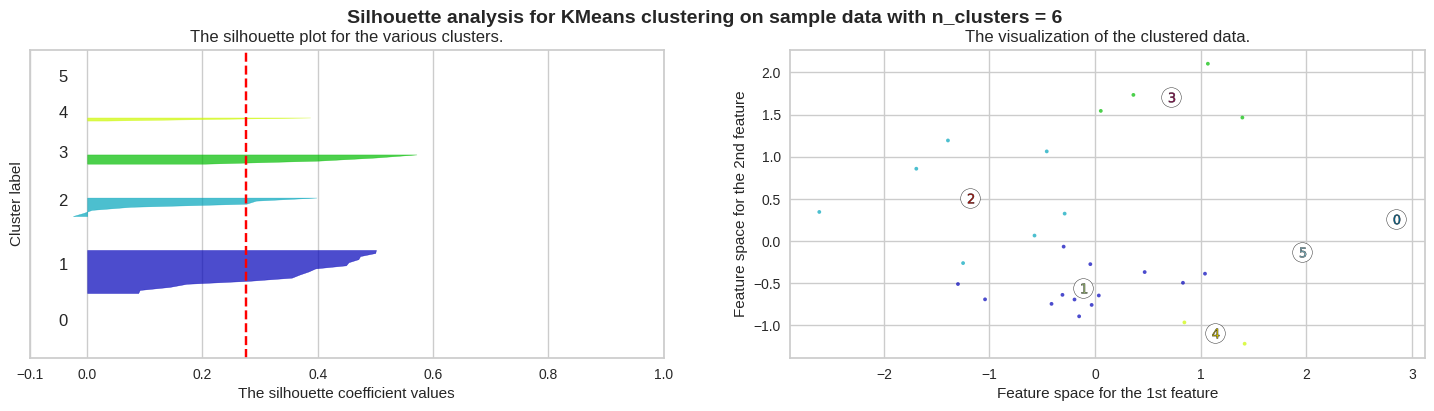

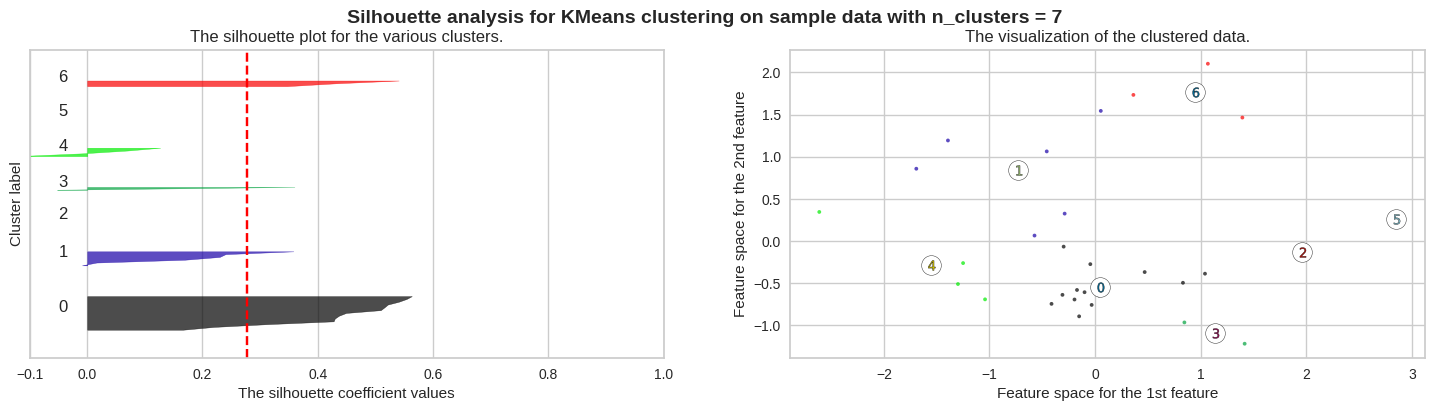

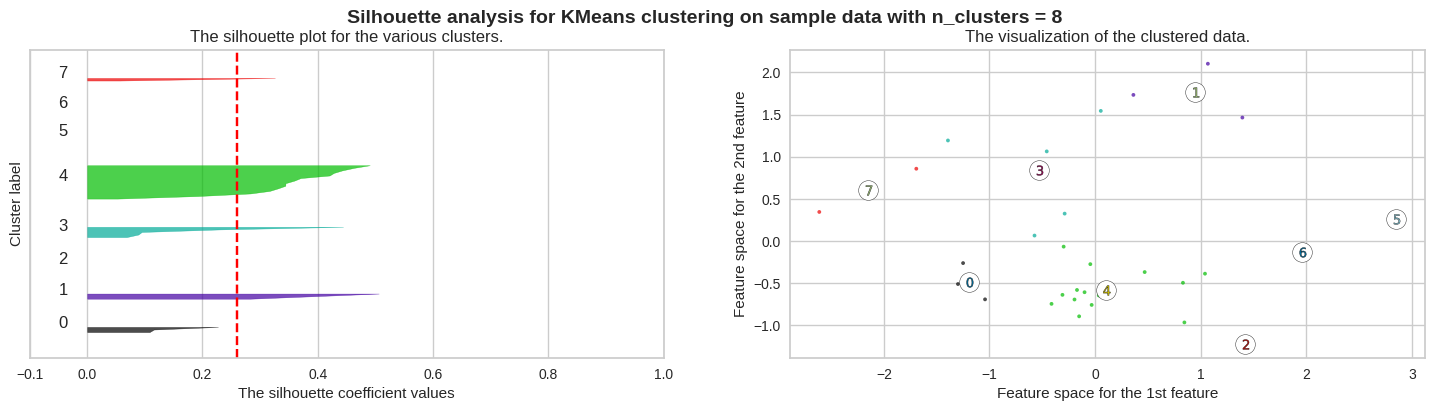

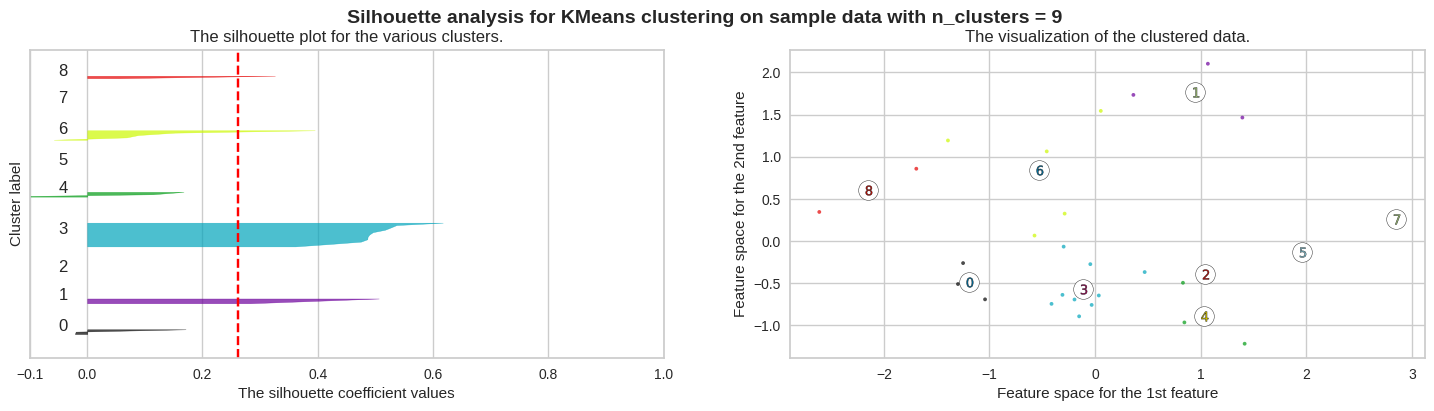

In [64]:
# Menampilkan Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), reduced_data, random_state)

# Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [65]:
# Melakukan training pada model K-Means dengan nilai k terbaik yang sudah dipilih yaitu 3
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
pred = km.fit_predict(reduced_data) #definisikan ke variabel pred
pred

array([4, 4, 4, 1, 1, 1, 3, 1, 0, 0, 3, 0, 1, 3, 1, 0, 2, 0, 3, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

In [66]:
km.n_iter_

3

`n_iter = 7` menunjukkan bahwa algoritma K-Means telah menjalani 7 iterasi sebelum mencapai konvergensi. Ini berarti bahwa dalam proses klasterisasi data, pusat-pusat klaster dan anggota klaster telah dihitung ulang dan diperbarui sebanyak 7 kali sebelum tidak ada perubahan signifikan dalam klasterisasi data yang ditemukan.

## EDA Hasil Clustering

In [68]:
# satukan hasil clustering dengan Data set original dengan menambahkan kolom 'cluster'

data_copy['cluster'] = pred
data_copy.head(30)

,company_id,share_outstanding_q1_2022,share_outstanding_q2_2022,share_outstanding_q3_2022,share_outstanding_q4_2022,share_outstanding_q1_2023,share_outstanding_q2_2023,share_outstanding_q3_2023,eps_q1_2022,eps_q2_2022,...,return_on_capital_employed_q2_2023,return_on_capital_employed_q3_2023,interest_coverage_q1_2022,interest_coverage_q2_2022,interest_coverage_q3_2022,interest_coverage_q4_2022,interest_coverage_q1_2023,interest_coverage_q2_2023,interest_coverage_q3_2023,cluster
0,BBCA,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,1.232800e+11,65.42,81.00,...,0.0117,0.0110,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
1,BBRI,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,1.515600e+11,80.28,83.26,...,0.0097,0.0104,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
2,TLKM,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,9.906000e+10,61.76,72.60,...,0.0568,0.0597,11.23,12.23,8.18,7.82,10.63,9.90,9.83,4
3,BMRI,4.667000e+10,4.667000e+10,4.667000e+10,4.667000e+10,4.667000e+10,9.333000e+10,9.333000e+10,214.96,218.09,...,0.0089,0.0095,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,ASII,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,4.048000e+10,169.43,279.50,...,0.0402,0.0334,17.96,22.40,19.16,20.61,20.20,18.54,10.91,1
5,ADRO,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,3.199000e+10,179.57,384.64,...,0.0635,0.0542,30.83,63.45,53.39,43.15,23.47,20.26,16.36,1
6,UNVR,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,3.815000e+10,52.98,36.93,...,0.2684,0.2775,79.94,159.88,105.66,40.18,44.53,83.72,110.40,3
7,INDF,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,8.780000e+09,268.53,61.83,...,0.0257,0.0352,4.97,1.56,2.60,2.15,6.37,4.49,6.12,1
8,ANTM,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,2.403000e+10,60.98,2.52,...,0.0148,0.0371,40.65,-1.41,66.16,4.76,27.56,13.71,6.11,0
9,PGAS,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,2.424000e+10,70.21,76.24,...,0.0256,0.0232,4.49,5.85,4.37,3.36,5.08,4.93,4.82,0


#### Visualisasi Data dengan n_components=8 dan Cluster = 5

<Axes: >

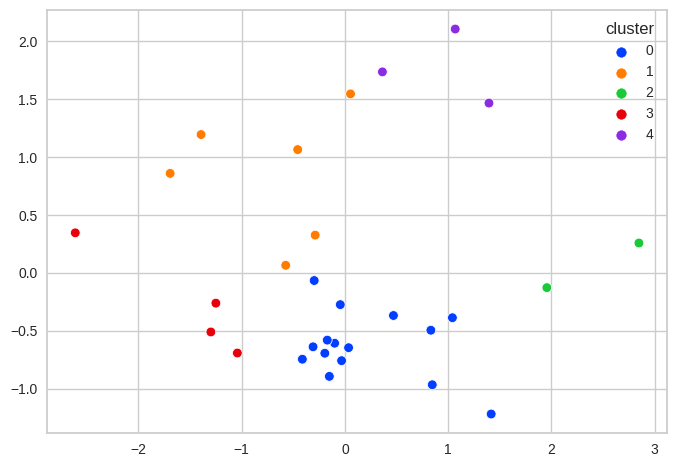

In [69]:
pca_2d = PCA(n_components=8)
pca_2d.fit(reduced_data)

scaled_pca_2d = pca_2d.fit_transform(reduced_data)

sns.scatterplot(x=scaled_pca_2d[:,0], y=scaled_pca_2d[:,1], hue=data_copy['cluster'], palette='bright')

#### Melihat Cluster 0

In [77]:
cluster_0_companies = data_copy[data_copy['cluster'] == 0]['company_id']
cluster_0_companies

8     ANTM
9     PGAS
11    KLBF
15    SMGR
17    CPIN
19    INCO
20    MEDC
21    BRPT
22    ARTO
23    MDKA
25    AKRA
26    TOWR
27    EMTK
28    AMRT
29    ESSA
Name: company_id, dtype: object

<ipython-input-86-230d69a064ad>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-230d69a064ad>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



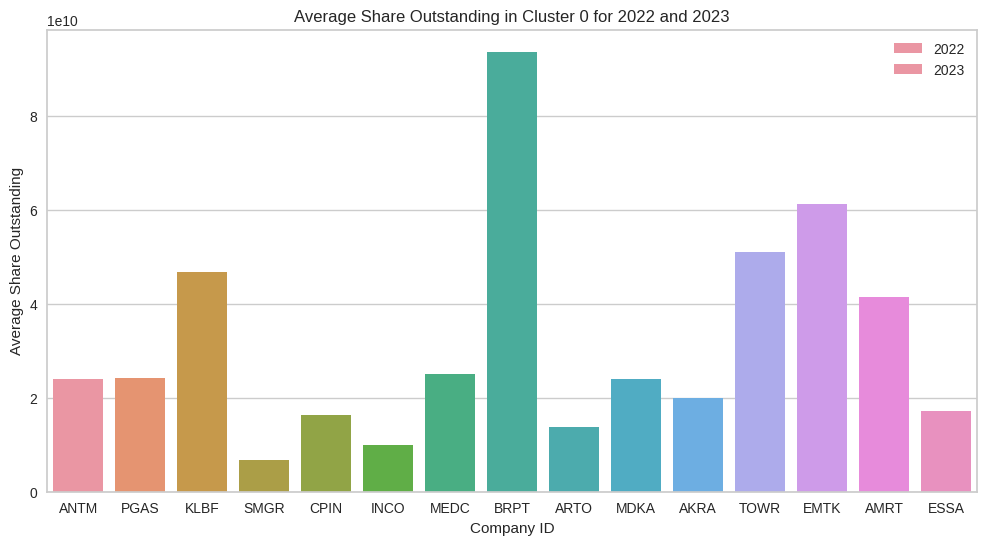

In [86]:
cluster_0_data = data_copy[data_copy['cluster'] == 0]

# Select relevant columns for share outstanding in 2022 and 2023
share_outstanding_cols_2022 = ['share_outstanding_q1_2022', 'share_outstanding_q2_2022', 'share_outstanding_q3_2022', 'share_outstanding_q4_2022']
share_outstanding_cols_2023 = ['share_outstanding_q1_2023', 'share_outstanding_q2_2023', 'share_outstanding_q3_2023']

# Calculate the average share outstanding for 2022 and 2023 in Cluster 2
cluster_0_data['average_share_outstanding_2022'] = cluster_0_data[share_outstanding_cols_2022].mean(axis=1)
cluster_0_data['average_share_outstanding_2023'] = cluster_0_data[share_outstanding_cols_2023].mean(axis=1)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_0_data, x='company_id', y='average_share_outstanding_2022', label='2022')
sns.barplot(data=cluster_0_data, x='company_id', y='average_share_outstanding_2023', label='2023')

plt.title('Average Share Outstanding in Cluster 0 for 2022 and 2023')
plt.xlabel('Company ID')
plt.ylabel('Average Share Outstanding')
plt.legend()
plt.show()

In [78]:
cluster_1_companies = data_copy[data_copy['cluster'] == 1]['company_id']
cluster_1_companies

3     BMRI
4     ASII
5     ADRO
7     INDF
12    BBNI
14    UNTR
Name: company_id, dtype: object

In [79]:
cluster_2_companies = data_copy[data_copy['cluster'] == 2]['company_id']
cluster_2_companies

16    GOTO
24    BUKA
Name: company_id, dtype: object

In [80]:
cluster_3_companies = data_copy[data_copy['cluster'] == 3]['company_id']
cluster_3_companies

6     UNVR
10    PTBA
13    ITMG
18    HRUM
Name: company_id, dtype: object

In [81]:
cluster_4_companies = data_copy[data_copy['cluster'] == 4]['company_id']
cluster_4_companies

0    BBCA
1    BBRI
2    TLKM
Name: company_id, dtype: object

# Model Evaluations

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [73]:
km.inertia_

36.95220751575581

**INSIGHT:**
- Terlihat bahwa nilai inertia pada kluster saya sebesar 2108.049. Pada konsep teorinya semakin kecil nilai intertia /SSE maka semakin mendekati nilai tengah cluster ,tetapi hal ini tidak menjadi patokan , kita bisa melihat dari faktor-faktor lain untuk mengetahui apakah cluster kita baik atau buruk.

- Menurut elbow method k = 4 adalah yang paling optimal, Tetapi saya belum bisa menentukan nilai K hanya dari Elbow method saja ,Saya perlu melihat dari plot Silhoutte,Silhoutte score dan juga visualisasi data clustering yang cocok menurut bisnis knowledge.

- Pada nilai silhouette score, nilai terbesar adalah pada k = 2,namun kemudian dilihat dari silhouette plot dan visualisasi data clustering k terbaik adalah 4 karena hanya sedikit data yang bercampur antara cluster . Hal ini yang menjadi pertimbangan saya mengapa saya tidak mengambil k = 2 .

- Mungkin kedepannya bisa dicoba untuk cara handling outlier yang berbeda, karena model ini sensitif terhadap outlier. Bisa juga dilakukan trial and error menggunakan Nilai K yang lain seperti nilai k=7 yang terlihat bagus juga.